# **Algorithm Workflow**

## **Input Data**
- HEA alloy historical data: $ H_1 $
- AL alloy historical data: $ H_2 $
- HEA data $ P_1 $ acquired from evolutionary optimization
- AL data $ P_2 $ acquired from evolutionary optimization
- The number of K-means clusters: **5**

## **Output Data**
- Solution set $ P_O $

---

## **Algorithm Steps**

### **Step 1:** 
Select the non-dominated solutions from $ H_1 $ and denote them as $ T_1 $.  
Mark the remaining solutions as $ R_1 = H_1 \setminus T_1 $.

### **Step 2:** 
Select the non-dominated solutions from $ H_2 $ and denote them as $ T_2 $.  
Mark the remaining solutions as $ R_2 = H_2 \setminus T_2 $.

### **Step 3:** 
Use $ T_1 $ as the input prompt and apply LLM to generate the knowledge book $ K_1 $.

### **Step 4:** 
Use $ T_2 $ as the input prompt and apply LLM to generate the knowledge book $ K_2 $.

---

## **Iteration Process (for iter = 1 to 10)**

### **Step 5:** 
Apply K-means clustering on $ R_1 $ and select:
- The solution closest to each cluster center.
- The solution farthest from $ T_1 $.  

These solutions form the temporary candidate set $ C_1 $.

### **Step 6:** 
Apply K-means clustering on $ R_2 $ and select:
- The solution closest to each cluster center.
- The solution farthest from $ T_2 $.  

These solutions form the temporary candidate set $ C_2 $.

### **Step 7:** 
Use $ T_1 $ and $ K_1 $ as the input prompt, apply LLM to evaluate $ C_1 $,  
and select the two solutions with the highest prediction error as $ U_1 $.  

Update sets:
$
T_1 = T_1 \cup U_1, \quad R_1 = R_1 \setminus U_1
$

### **Step 8:** 
Use $ T_2 $ and $ K_2 $ as the input prompt, apply LLM to evaluate $ C_2 $,  
and select the two solutions with the highest prediction error as $ U_2 $.  

Update sets:
$
T_2 = T_2 \cup U_2, \quad R_2 = R_2 \setminus U_2
$

### **Step 9:** 
Use $ T_1 $, $ K_1 $, and LLM’s predictions on $ C_1 $ along with ground truth fitness as input prompts.  
Apply LLM to update $ K_1 $.

### **Step 10:** 
Use $ T_2 $, $ K_2 $, and LLM’s predictions on $ C_2 $ along with ground truth fitness as input prompts.  
Apply LLM to update $ K_2 $.

---

## **Final Steps**

### **Step 11:** 
Merge $ P_1 $ and $ P_2 $ to generate the merged dataset $ P_M $.  
Remove solutions in $ P_M $ that do not meet the density criteria.

### **Step 12:** 
Use $ T_1 $, $ K_1 $, $ T_2 $, and $ K_2 $ as input prompts.  
Apply LLM to predict solutions in $ P_M $.

### **Step 13:** 
Based on LLM predictions, select non-dominated solutions.  
Considering diversity, choose a fixed number of solutions to form the final output set $ P_O $.


# **ALgorithm Pseudocode**

## **Input:**
- $ H_1 $ : HEA alloy historical data
- $ H_2 $ : AL alloy historical data
- $ P_1 $ : HEA data acquired from evolutionary optimization
- $ P_2 $ : AL data acquired from evolutionary optimization
- $ K $ : Number of K-means clusters (set to 5)
- $ max\_iter $ : Maximum iteration count (set to 10)

## **Output:**
- $ P_O $ : Final selected solution set

---

## **Pseudo-code:**
```python
# Step 1-2: Identify Non-Dominated Solutions
T1 ← NonDominatedSolutions(H1)
R1 ← H1 \ T1
T2 ← NonDominatedSolutions(H2)
R2 ← H2 \ T2

# Step 3-4: Generate Knowledge Books using LLM
K1 ← LLM_Generate_Knowledge_Book(T1)
K2 ← LLM_Generate_Knowledge_Book(T2)

# Iterative Process
for iter in range(1, max_iter + 1):

    # Step 5: Cluster R1 and select candidates
    C1 ← []
    clusters_R1 ← KMeans_Clustering(R1, K)
    for cluster in clusters_R1:
        closest_center ← FindClosestToCenter(cluster)
        farthest_T1 ← FindFarthestFrom(T1, cluster)
        C1.append(closest_center)
        C1.append(farthest_T1)

    # Step 6: Cluster R2 and select candidates
    C2 ← []
    clusters_R2 ← KMeans_Clustering(R2, K)
    for cluster in clusters_R2:
        closest_center ← FindClosestToCenter(cluster)
        farthest_T2 ← FindFarthestFrom(T2, cluster)
        C2.append(closest_center)
        C2.append(farthest_T2)

    # Step 7: Evaluate C1 with LLM and update T1
    U1 ← LLM_Evaluate_And_Select_Highest_Error(C1, T1, K1)
    T1 ← T1 ∪ U1
    R1 ← R1 \ U1

    # Step 8: Evaluate C2 with LLM and update T2
    U2 ← LLM_Evaluate_And_Select_Highest_Error(C2, T2, K2)
    T2 ← T2 ∪ U2
    R2 ← R2 \ U2

    # Step 9: Update Knowledge Book K1
    K1 ← LLM_Update_Knowledge_Book(T1, C1, K1)

    # Step 10: Update Knowledge Book K2
    K2 ← LLM_Update_Knowledge_Book(T2, C2, K2)

# Step 11: Merge and filter P1 and P2
P_M ← MergeData(P1, P2)
P_M ← RemoveHighDensitySolutions(P_M)

# Step 12: Predict with LLM
Predictions ← LLM_Predict_Solutions(T1, K1, T2, K2, P_M)

# Step 13: Select non-dominated solutions considering diversity
P_O ← Select_NonDominated_Diverse_Solutions(Predictions)

# Return final solution set
return P_O


# **Code analysis on HEA**

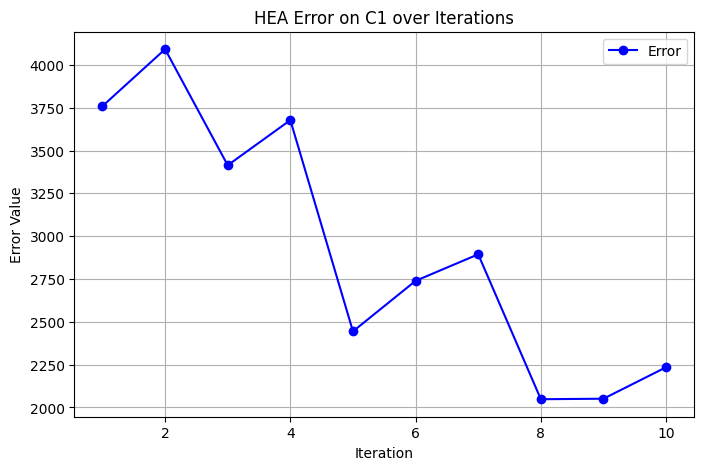

In [40]:
import numpy as np
import re
import pandas as pd
import matplotlib.pyplot as plt

All_error = []
for iter in range(10):
    file_path = fr'C:\Users\LZhening\Desktop\ProcessData\LLM_reevaluate_data_{iter}.xlsx'
    col1, col2, col3 = [], [], []
    columns = [col1, col2, col3]
    df = pd.read_excel(file_path, header=None)
    df = df.iloc[1:, :]
    for row in range(df.shape[0]):
        for col in range(df.shape[1]):
            s = df.iloc[row, col]
            s_cleaned = s.replace('\n', '').strip()
            s_cleaned = s_cleaned.strip('[]')
            s_list = [float(num) for num in re.findall(r'[-+]?\d*\.\d+|\d+', s_cleaned)]
            columns[col].append(s_list)
    Reevaluate_X = columns[0]
    Reevaluate_X = np.array(Reevaluate_X)
    Reevaluate_Y = columns[1]
    Reevaluate_Y = np.array(Reevaluate_Y)
    LLM_evaluate_Y = columns[2]
    LLM_evaluate_Y = np.array(LLM_evaluate_Y)
    errors = np.sqrt(np.mean((LLM_evaluate_Y - Reevaluate_Y) ** 2, axis=1))
    All_error.append(np.sum(errors))

plt.figure(figsize=(8, 5))
plt.plot(range(1, len(All_error) + 1), All_error, marker='o', linestyle='-', color='b', label='Error')
plt.xlabel('Iteration')
plt.ylabel('Error Value')
plt.title('HEA Error on C1 over Iterations')
plt.legend()
plt.grid(True)
plt.show()

# **Code analysis on AL**

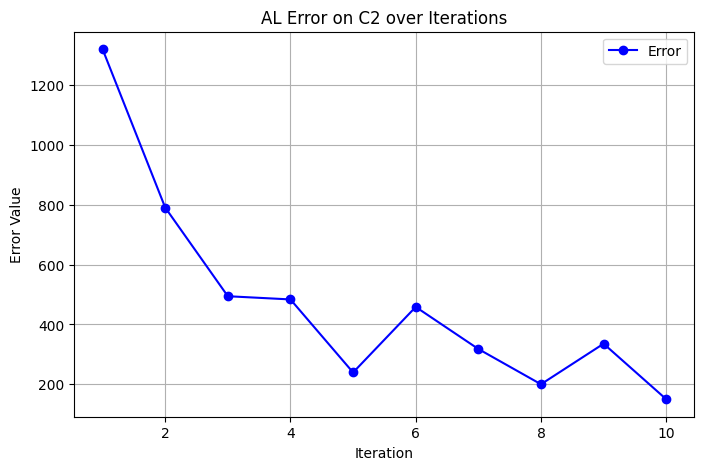

In [41]:
import numpy as np
import re
import pandas as pd
import matplotlib.pyplot as plt

All_error = []
for iter in range(10):
    file_path = fr'C:\Users\LZhening\Desktop\ProcessData\LLM_reevaluate_data_AL_{iter}.xlsx'
    col1, col2, col3 = [], [], []
    columns = [col1, col2, col3]
    df = pd.read_excel(file_path, header=None)
    df = df.iloc[1:, :]
    for row in range(df.shape[0]):
        for col in range(df.shape[1]):
            s = df.iloc[row, col]
            s_cleaned = s.replace('\n', '').strip()
            if ',' in s_cleaned:
                s_cleaned = s_cleaned.replace(',', ' ')
            s_cleaned = s_cleaned.strip('[]')
            s_list = [float(num) for num in s_cleaned.split()]
            columns[col].append(s_list)
    Reevaluate_X = columns[0]
    Reevaluate_X = np.array(Reevaluate_X)
    Reevaluate_Y = columns[1]
    Reevaluate_Y = np.array(Reevaluate_Y)
    LLM_evaluate_Y = columns[2]
    LLM_evaluate_Y = np.array(LLM_evaluate_Y)
    errors = np.sqrt(np.mean((LLM_evaluate_Y - Reevaluate_Y) ** 2, axis=1))
    All_error.append(np.sum(errors))

plt.figure(figsize=(8, 5))
plt.plot(range(1, len(All_error) + 1), All_error, marker='o', linestyle='-', color='b', label='Error')
plt.xlabel('Iteration')
plt.ylabel('Error Value')
plt.title('AL Error on C2 over Iterations')
plt.legend()
plt.grid(True)
plt.show()